# **Tugas Kecil 2 IF3170 Inteligensi Buatan Exploratory Data Analysis**

## Author
| Name | NIM |
| --- | --- |
| Angger Ilham Amanullah | 13521001 |
| Ditra Rizqa Amadia | 13521019 |
| Bernardus Willson | 13521021 |
| Raynard Tanadi | 13521143 |

## Dependencies
* pandas
* matplotlib
* seaborn
* numpy
* pypair
* scikit-learn
* scipy
* pickle

## Problems
- [Statistik dasar](#Problem-1)
- [Duplicate value](#Problem-2)
- [Missing value](#Problem-3)
- [Outlier](#Problem-4)
- [Distribusi data dan histogram](#Problem-5)
- [Korelasi dengan kolom target](#Problem-6)

## 1. Import Libraries

In [18]:
# install libraries
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install numpy
# %pip install pypair
# %pip install scikit-learn
# %pip install scipy

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pypair.association import binary_continuous
import pickle
import warnings

# configuration
warnings.filterwarnings("ignore",category=Warning)
pd.set_option('display.max_columns', None)

## 2. Load Dataset and Overview

In [19]:
# load dataset
input_path = './data-input/'
output_path = './data-output/'
model_path = './model/'

df_train = pd.read_csv(f"{input_path}data_train.csv")
df_validation = pd.read_csv(f"{input_path}data_validation.csv")
df_test = pd.read_csv(f"{input_path}test.csv")

In [20]:
# shape of dataset
print(f'The dataset has {df_train.shape[0]} row and {df_train.shape[1]} column')

The dataset has 1400 row and 21 column


In [21]:
# overview of dataset
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,13,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,16,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,0,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,13,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,2,464,781,565,18,12,9,0,0,1,0


In [22]:
# data types of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

In [23]:
# check for binary features
def is_binary_feature(data):
    unique_values = data.unique()
    return len(unique_values) == 2 and all(value in {0, 1} for value in unique_values)

In [24]:
# numerical train columns
df_train_numerical = df_train.select_dtypes(include=[np.number]).loc[:, ~df_train.columns.isin(df_train.columns[df_train.apply(is_binary_feature, axis=0)])]
df_train_numerical = df_train_numerical.drop(columns=['price_range'])

# non-numerical train columns
df_train_non_numerical = df_train.select_dtypes(include=[np.number]).loc[:, df_train.columns.isin(df_train.columns[df_train.apply(is_binary_feature, axis=0)])]

# target column
df_target = df_train['price_range']

In [25]:
# numerical validation columns
df_validation_numerical = df_validation.select_dtypes(include=[np.number]).loc[:, ~df_validation.columns.isin(df_validation.columns[df_validation.apply(is_binary_feature, axis=0)])]
df_validation_numerical = df_validation_numerical.drop(columns=['price_range'])

# non-numerical validation columns
df_validation_non_numerical = df_validation.select_dtypes(include=[np.number]).loc[:, df_validation.columns.isin(df_validation.columns[df_validation.apply(is_binary_feature, axis=0)])]

# target column
df_validation_target = df_validation['price_range']

In [26]:
# drop unused columns
df_test = df_test.drop(columns=['id'])

# numerical test columns
df_test_numerical = df_test.select_dtypes(include=[np.number]).loc[:, ~df_test.columns.isin(df_test.columns[df_test.apply(is_binary_feature, axis=0)])]

# non-numerical test columns
df_test_non_numerical = df_test.select_dtypes(include=[np.number]).loc[:, df_test.columns.isin(df_test.columns[df_test.apply(is_binary_feature, axis=0)])]

## 3. Data Cleaning

#### Check Duplicate Rows

In [27]:
# data cleaning (duplicates) for train data

# check for duplicates
duplicated_rows = df_train.duplicated()
total_duplicated_rows = duplicated_rows.sum()

if total_duplicated_rows > 0:
    df_train.drop_duplicates(inplace=True)
    print("Total Duplicated Rows:", total_duplicated_rows)
    print("Duplicated Rows:")
    print(df_train[duplicated_rows].to_string(index=False))
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [28]:
# data cleaning (duplicates) for validation data

# check for duplicates
duplicated_rows = df_validation.duplicated()
total_duplicated_rows = duplicated_rows.sum()

if total_duplicated_rows > 0:
    df_validation.drop_duplicates(inplace=True)
    print("Total Duplicated Rows:", total_duplicated_rows)
    print("Duplicated Rows:")
    print(df_validation[duplicated_rows].to_string(index=False))
else:
    print("No duplicated rows found.")

No duplicated rows found.


#### Invalid Data

In [29]:
# data cleaning (invalid values)

# print the count of zero values for each column
print("Count of Zero Values:")

zero_counts = (df_train == 0).sum()
print(zero_counts)

# impute zero values on px_height and sc_w with median
df_train['px_height'].replace(0,df_train['px_height'].median(),inplace=True)
df_train['sc_w'].replace(0,df_train['sc_w'].median(),inplace=True)

df_validation['px_height'].replace(0,df_validation['px_height'].median(),inplace=True)
df_validation['sc_w'].replace(0,df_validation['sc_w'].median(),inplace=True)

df_test['px_height'].replace(0,df_test['px_height'].median(),inplace=True)
df_test['sc_w'].replace(0,df_test['sc_w'].median(),inplace=True)

Count of Zero Values:
battery_power      0
blue             709
clock_speed        0
dual_sim         696
fc               338
four_g           658
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                70
px_height          1
px_width           0
ram                0
sc_h               0
sc_w             137
talk_time          0
three_g          335
touch_screen     715
wifi             707
price_range      358
dtype: int64


#### Check Missing Values

In [30]:
# data cleaning (missing values)

# check for null / missing values
def check_null_values(data):
    missing = data.isnull().sum()
    nans = missing[missing > 0].sort_values(ascending=False)
    if nans.empty:
        print("No missing values found.")
    else :
        for column in nans.index :
            print(f'{column} Null values : {round(100 - data[column].value_counts().sum()/len(data) * 100, 2)}% of the dataset ({len(data) - data[column].value_counts().sum()})')

# remove missing values
check_null_values(df_train)
df_train = df_train.dropna()

check_null_values(df_validation)
df_validation = df_validation.dropna()

No missing values found.
No missing values found.


#### Check Outlier

In [31]:
# calculate lower and upper limit for outliers
def get_limit(col, data, iqr_threshold):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - iqr_threshold * IQR
    upper_limit = Q3 + iqr_threshold * IQR
    
    return (lower_limit, upper_limit)

# get outlier rows
def get_outlier(col, data, iqr_threshold):
    lower_limit, upper_limit = get_limit(col, data, iqr_threshold)
    outlier_rows = (data[col] < lower_limit) | (data[col] > upper_limit)
    
    return outlier_rows

# # impute outliers with mean
# def replace_outliers_with_mean(column, data, threshold):
#     outlier_rows = get_outlier(column, data, threshold)
#     mean_value = data.loc[~outlier_rows, column].mean()
#     data.loc[outlier_rows, column] = mean_value

In [32]:
# check for outliers using IQR method
iqr_threshold = 1.5
no_outliers = True

# outlier visualization
def plot_outlier(col, data, iqr_threshold):
    outlier_rows = get_outlier(col, data, iqr_threshold)
    
    plt.figure(figsize=(15, 5))
    
    # scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(data.index[outlier_rows], data[col][outlier_rows], color='red', label='Outliers')
    plt.scatter(data.index[~outlier_rows], data[col][~outlier_rows], color='blue', label='Data')
    plt.legend()
    plt.title(f'Outliers in {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    
    # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='green')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    
    plt.show()

Limit values and outliers of train data:

Limits values of fc:
Lower limit: -8.0
Upper limit: 16.0
Outlier values from fc:
53      19
98      18
413     17
603     18
778     18
797     17
1035    18
1072    18
1150    18
1232    18
1342    17
Name: fc, dtype: int64


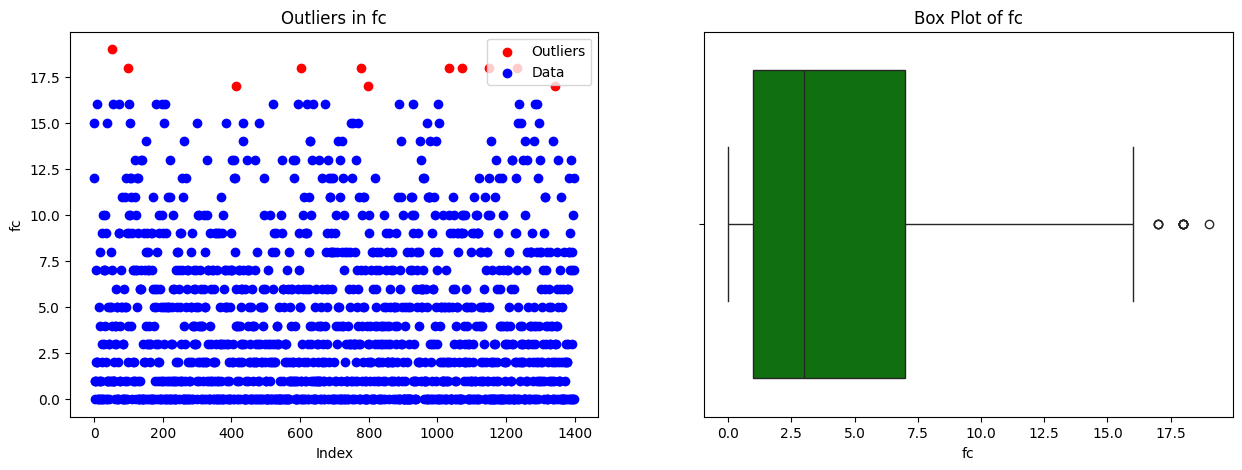

Total outliers from fc: 11



In [33]:
# check for outliers in numerical columns for train data
print("Limit values and outliers of train data:\n")
for col in df_train_numerical:
    lower_limit, upper_limit = get_limit(col, df_train_numerical, iqr_threshold)
    outlier_rows = get_outlier(col, df_train_numerical, iqr_threshold)
    total_outlier_rows = outlier_rows.sum()
    if total_outlier_rows > 0:
        # print limits
        print(f'Limits values of {col}:')
        print(f'Lower limit: {lower_limit}')
        print(f'Upper limit: {upper_limit}')
        
        # print outlier values
        print(f'Outlier values from {col}:')
        print(df_train[col][outlier_rows])
        plot_outlier(col, df_train, iqr_threshold)
        no_outliers = False
        print(f'Total outliers from {col}: {total_outlier_rows}')

        # # replace with mean
        # replace_outliers_with_mean(col, df_train, iqr_threshold)
        print('')

if no_outliers:
    print("No outliers found in any column.")

Limit values and outliers of validation data:

Limits values from fc:
Lower limit: -8.0
Upper limit: 16.0
Outlier values from fc:
45     17
68     17
101    17
433    18
565    18
566    18
568    18
Name: fc, dtype: int64


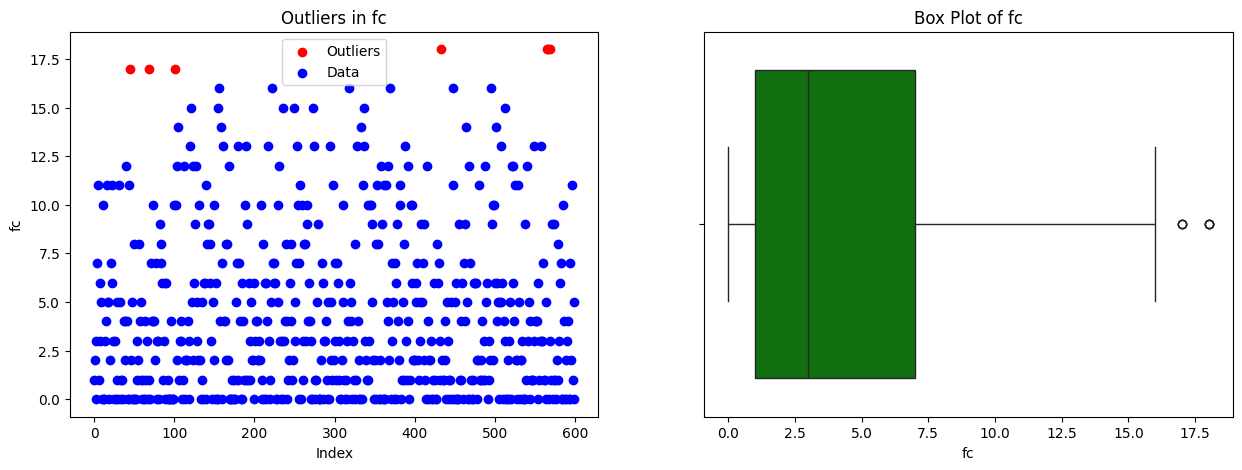

Total outliers from fc: 7

Limits values from px_height:
Lower limit: -620.875
Upper limit: 1858.125
Outlier values from px_height:
353    1901.0
551    1899.0
Name: px_height, dtype: float64


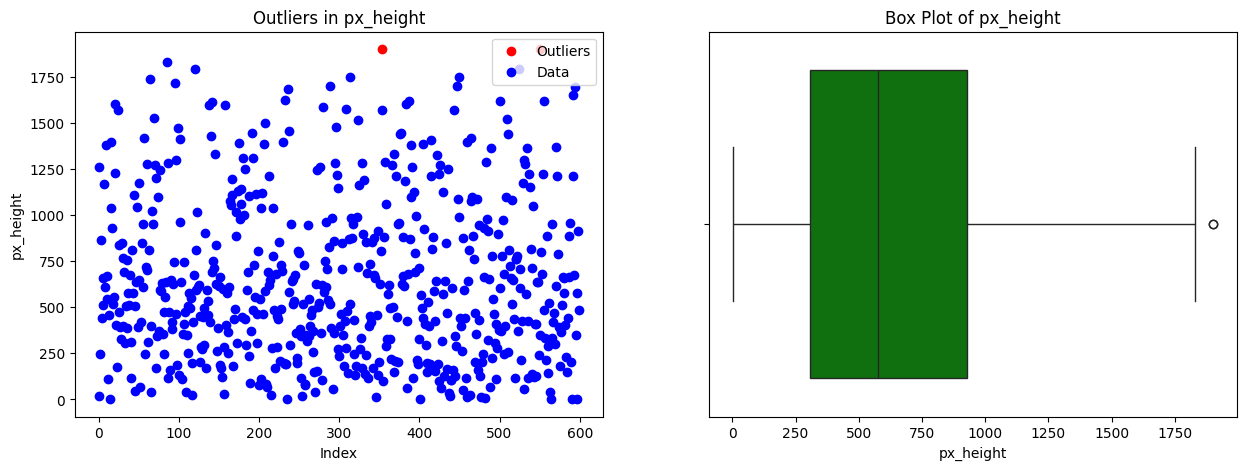

Total outliers from px_height: 2



In [34]:
# check for outliers in numerical columns for validation data
print("Limit values and outliers of validation data:\n")
for col in df_validation_numerical:
    lower_limit, upper_limit = get_limit(col, df_validation, iqr_threshold)
    outlier_rows = get_outlier(col, df_validation, iqr_threshold)
    total_outlier_rows = outlier_rows.sum()
    if total_outlier_rows > 0:
        # print limits
        print(f'Limits values from {col}:')
        print(f'Lower limit: {lower_limit}')
        print(f'Upper limit: {upper_limit}')
        
        # print outlier values
        print(f'Outlier values from {col}:')
        print(df_validation[col][outlier_rows])
        plot_outlier(col, df_validation, iqr_threshold)
        no_outliers = False
        print(f'Total outliers from {col}: {total_outlier_rows}')

        # # replace with mean
        # replace_outliers_with_mean(col, df_validation, iqr_threshold)
        print('')

if no_outliers:
    print("No outliers found in any column.")

Limit values and outliers of test data:

Limits values from fc:
Lower limit: -6.5
Upper limit: 13.5
Outlier values from fc:
7       14
61      14
310     16
332     14
335     14
406     15
418     14
434     14
654     15
688     16
696     15
803     15
878     15
934     17
993     14
1012    17
1114    15
1136    14
1163    14
1233    16
1237    17
1328    14
1487    15
1574    14
1600    14
1686    17
1711    14
1789    15
1802    16
1815    15
1835    17
1845    15
1916    14
1938    15
Name: fc, dtype: int64


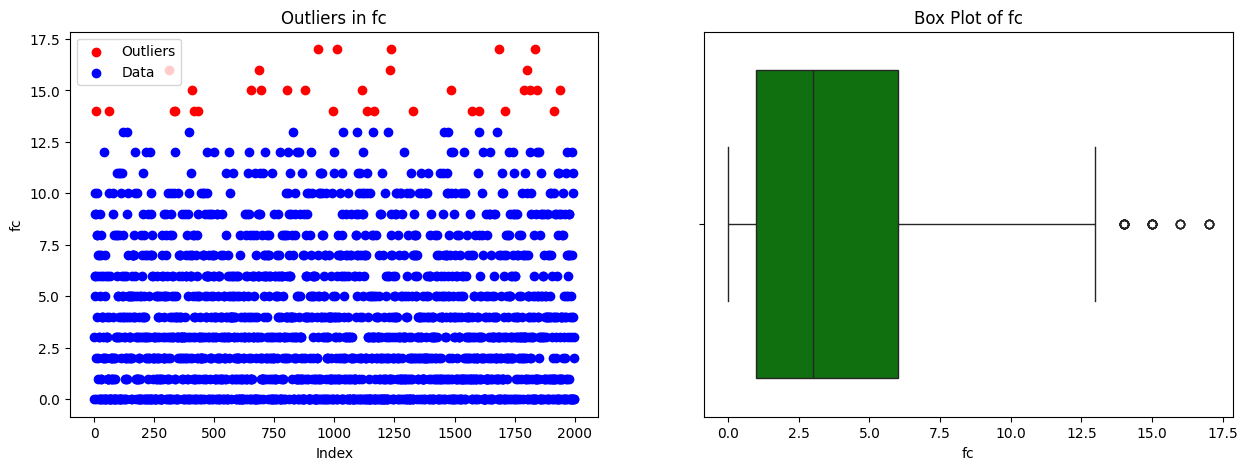

Total outliers from fc: 34

Limits values from px_height:
Lower limit: -685.75
Upper limit: 1904.25
Outlier values from px_height:
987     1907
1882    1911
Name: px_height, dtype: int64


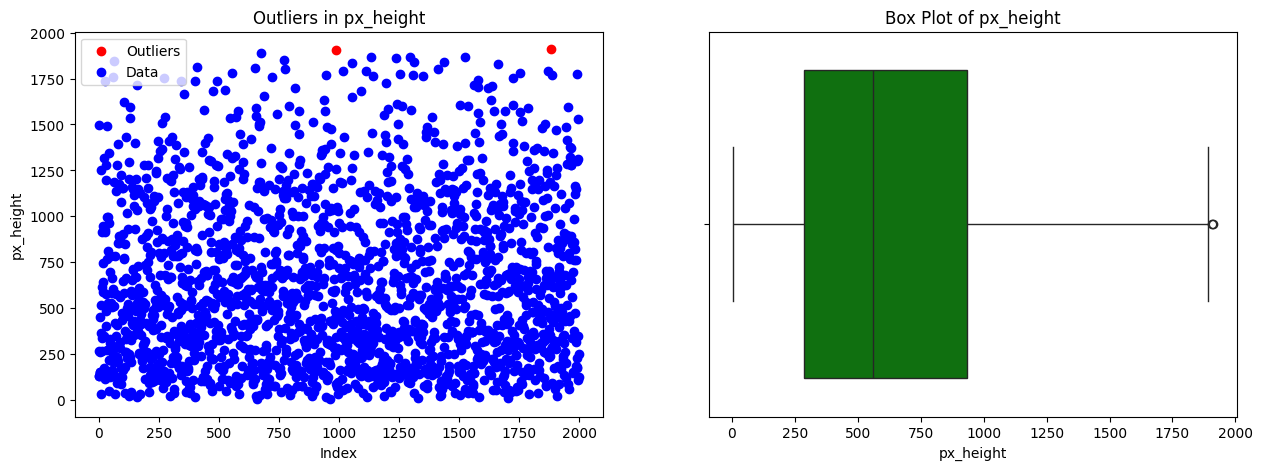

Total outliers from px_height: 2

Limits values from sc_w:
Lower limit: -4.5
Upper limit: 15.5
Outlier values from sc_w:
37      16
188     16
389     17
683     16
863     17
1053    16
1239    17
1344    16
Name: sc_w, dtype: int64


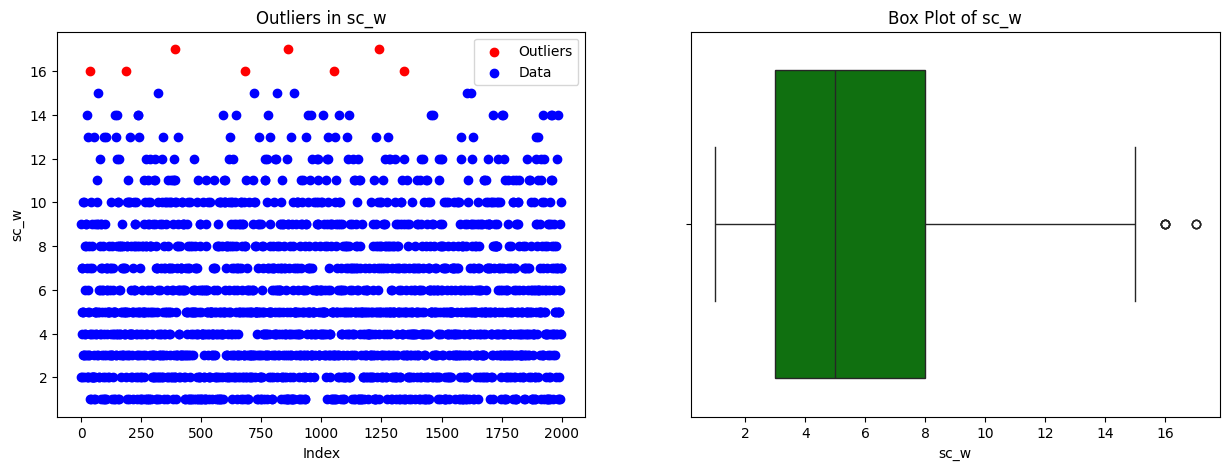

Total outliers from sc_w: 8



In [35]:
# check for outliers in numerical columns for test data
print("Limit values and outliers of test data:\n")
for col in df_test_numerical:
    lower_limit, upper_limit = get_limit(col, df_test, iqr_threshold)
    outlier_rows = get_outlier(col, df_test, iqr_threshold)
    total_outlier_rows = outlier_rows.sum()
    if total_outlier_rows > 0:
        # print limits
        print(f'Limits values from {col}:')
        print(f'Lower limit: {lower_limit}')
        print(f'Upper limit: {upper_limit}')
        
        # print outlier values
        print(f'Outlier values from {col}:')
        print(df_test[col][outlier_rows])
        plot_outlier(col, df_test, iqr_threshold)
        no_outliers = False
        print(f'Total outliers from {col}: {total_outlier_rows}')

        # # replace with mean
        # replace_outliers_with_mean(col, df_test, iqr_threshold)
        print('')

if no_outliers:
    print("No outliers found in any column.")

## 4. Exploratory Data Analysis (EDA)

#### Basic Statistics

In [36]:
# basic statistics of numerical columns of train data
print('Basic statistics of numerical columns')
display(df_train_numerical.describe())
print('')

# mode of non-numerical columns of train data
print('Mode of non-numerical columns')
display(df_train_non_numerical.mode().rename(index={0: 'mode'}))
print('')

# mode and median of target column
print('Mode and median of price_range (target column)')
mode_value = df_target.mode()[0]
median_value = df_target.median()
target_stats = pd.DataFrame({
    '': ['mode', 'median'],
    'price_range': [mode_value, median_value]
})
target_stats = target_stats.set_index('')
display(target_stats)

Basic statistics of numerical columns


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1237.145714,1.521714,4.27500,31.962143,0.507857,139.375714,4.481429,9.917143,643.177857,1251.717143,2106.731429,12.285714,5.665000,11.042143
std,430.051785,0.814723,4.32417,18.162970,0.288539,35.400803,2.279836,6.080023,444.628980,428.982850,1078.347277,4.204198,4.372234,5.399052
min,501.000000,0.500000,0.00000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,864.750000,0.700000,1.00000,16.000000,0.200000,108.000000,2.000000,5.000000,273.750000,876.500000,1201.000000,9.000000,2.000000,6.000000
50%,1219.000000,1.500000,3.00000,32.000000,0.500000,139.000000,4.000000,10.000000,561.000000,1247.000000,2102.000000,12.000000,5.000000,11.000000
75%,1602.000000,2.200000,7.00000,48.000000,0.800000,169.000000,7.000000,15.000000,950.250000,1627.500000,3035.750000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.00000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000



Mode of non-numerical columns


,blue,dual_sim,four_g,three_g,touch_screen,wifi
mode,0,1,1,1,0,0



Mode and median of price_range (target column)


,price_range
,
mode,0.0
median,1.0


In [37]:
# check unique values of train data
print(df_train.nunique())

battery_power     918
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         934
px_width          908
ram              1170
sc_h               15
sc_w               18
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


#### Distribution

Distributions of numerical columns of train data


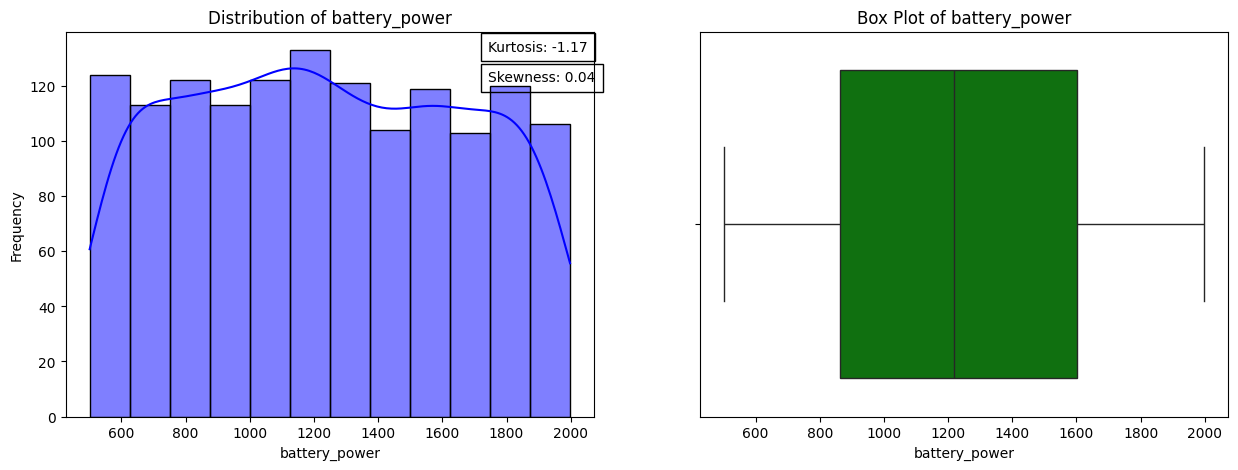

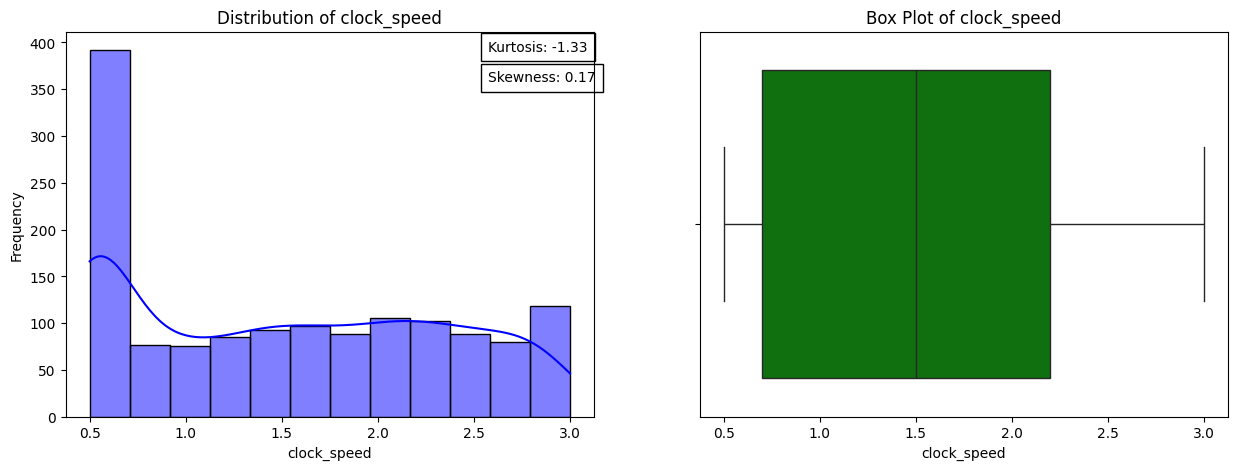

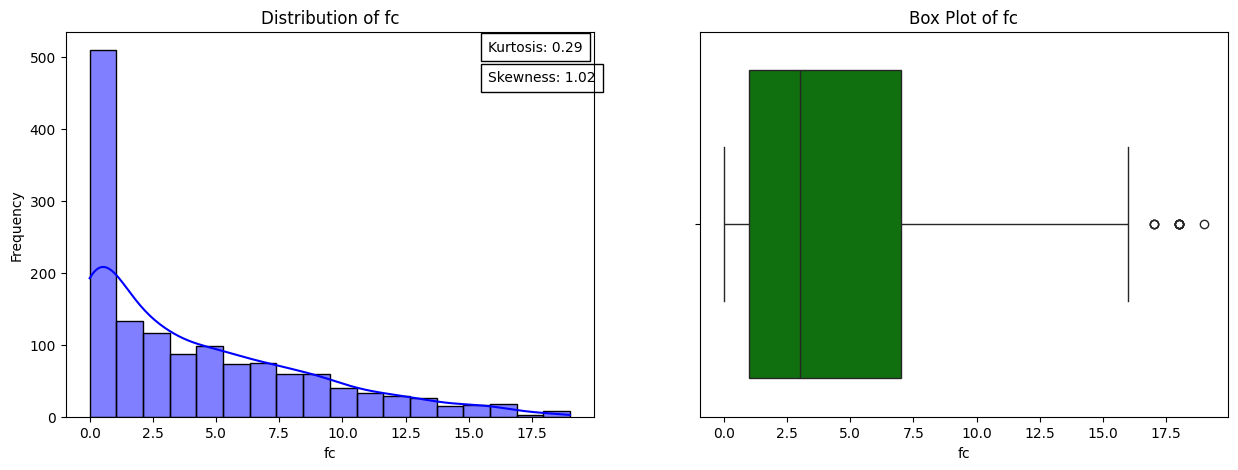

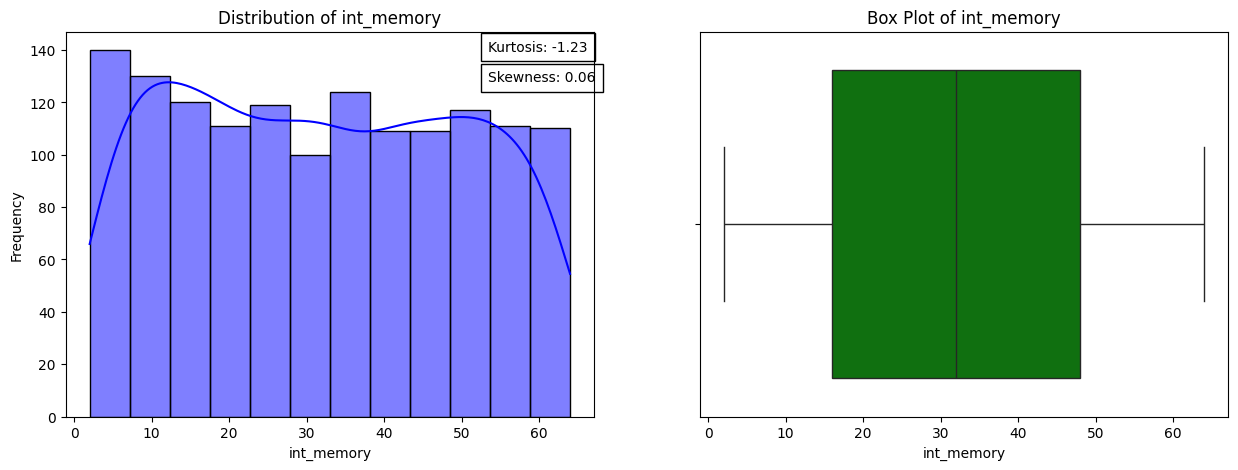

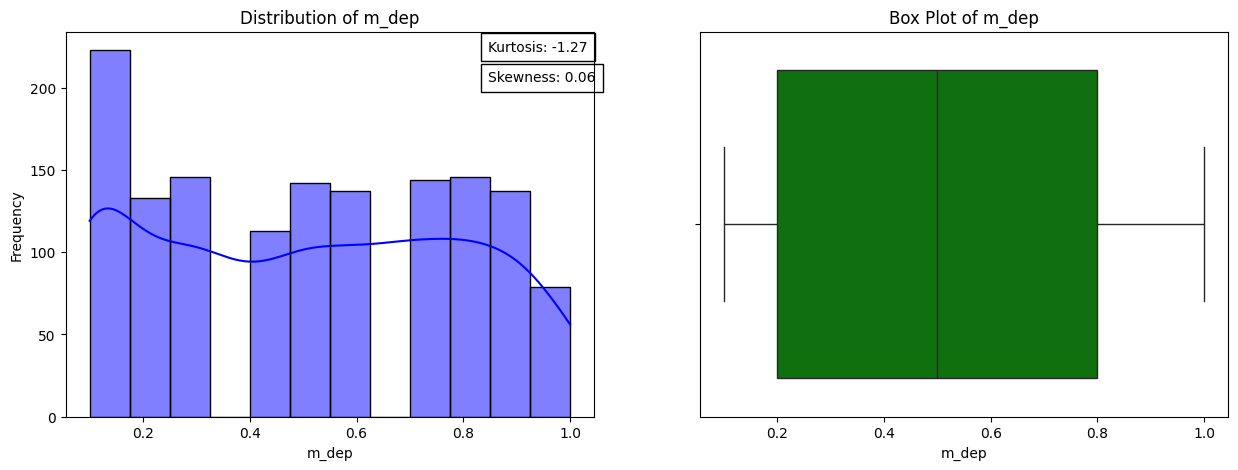

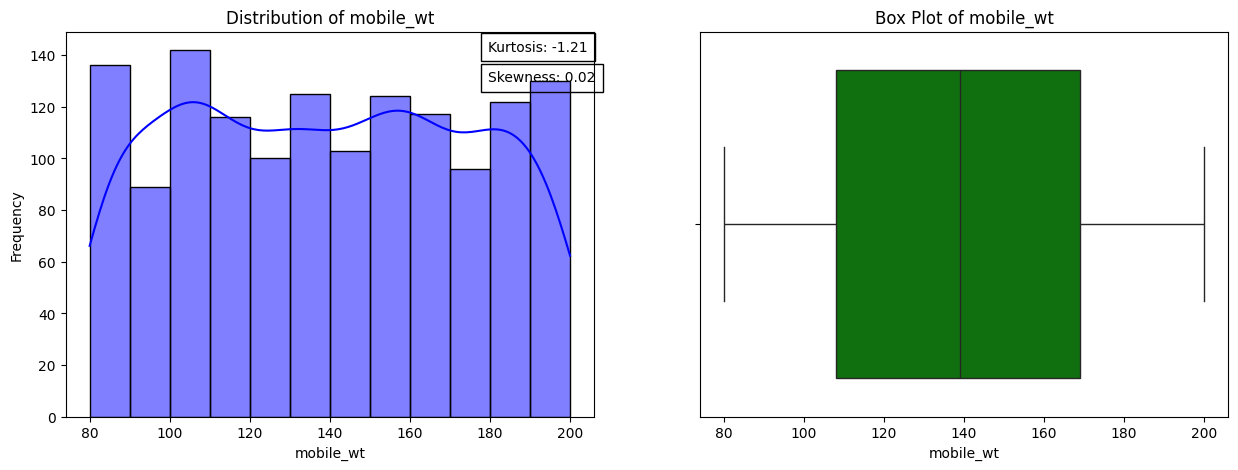

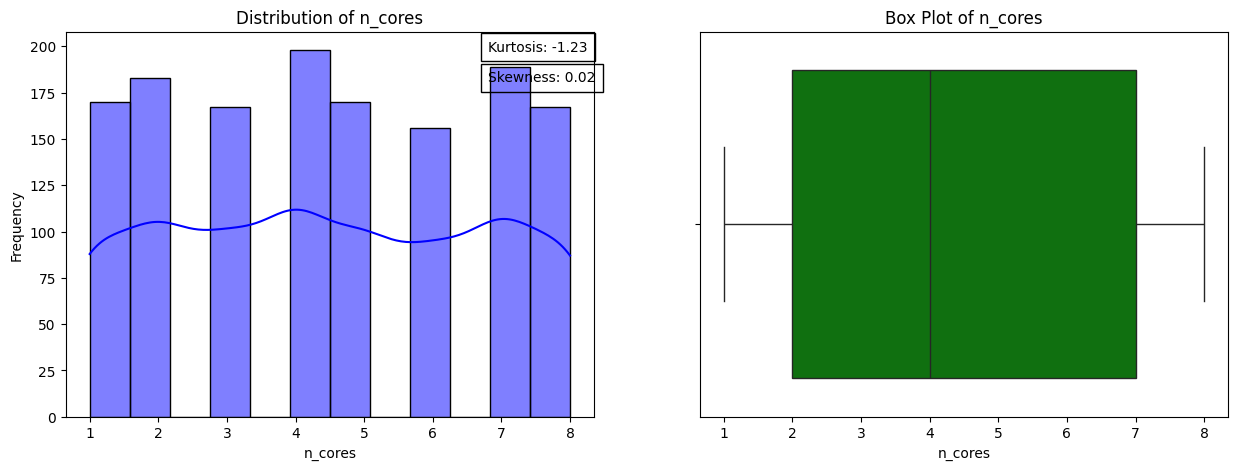

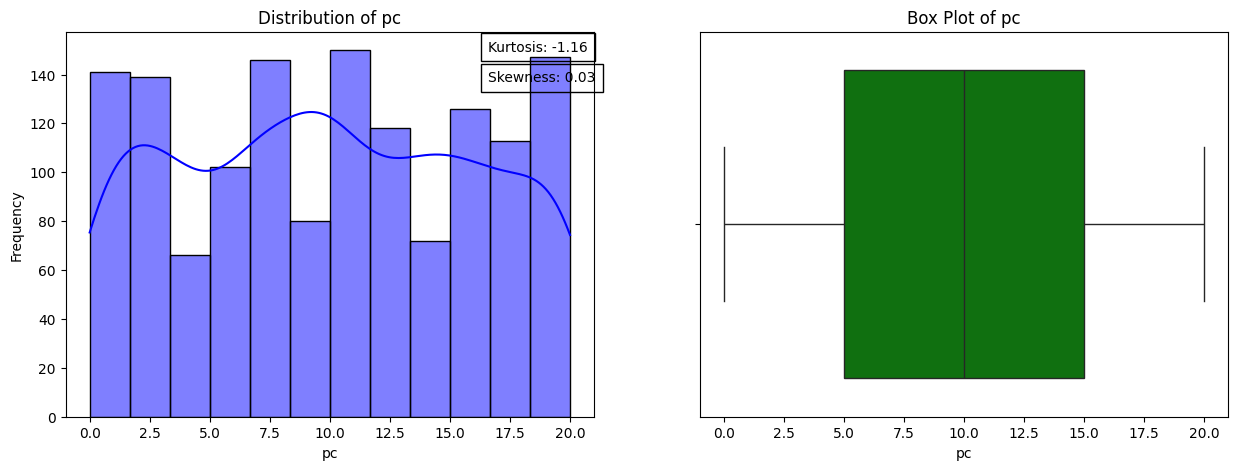

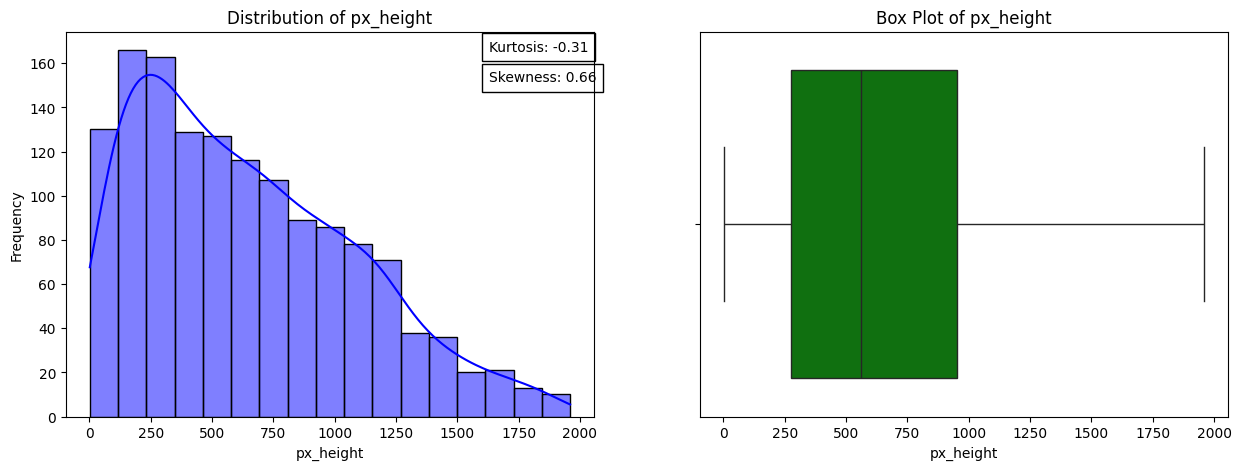

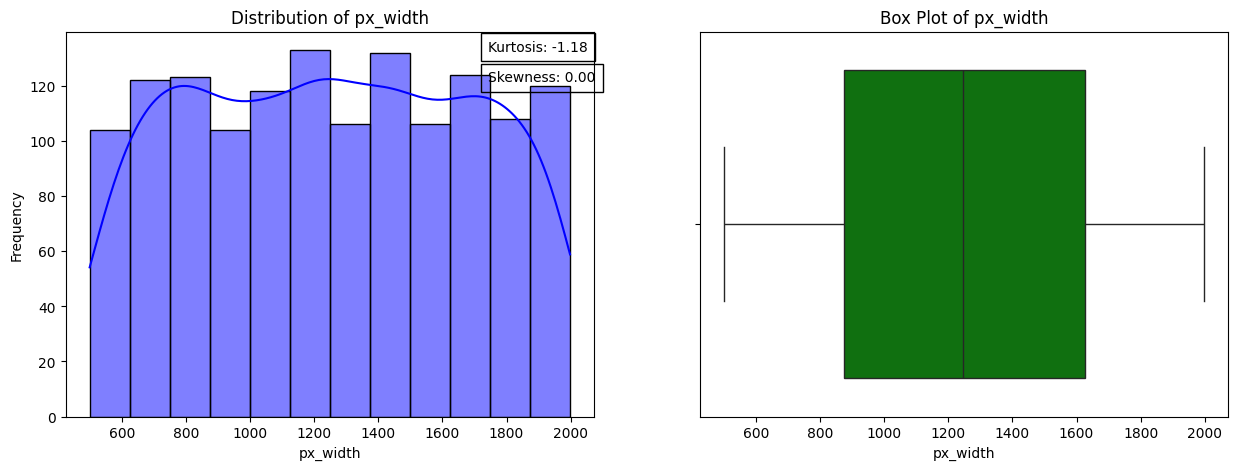

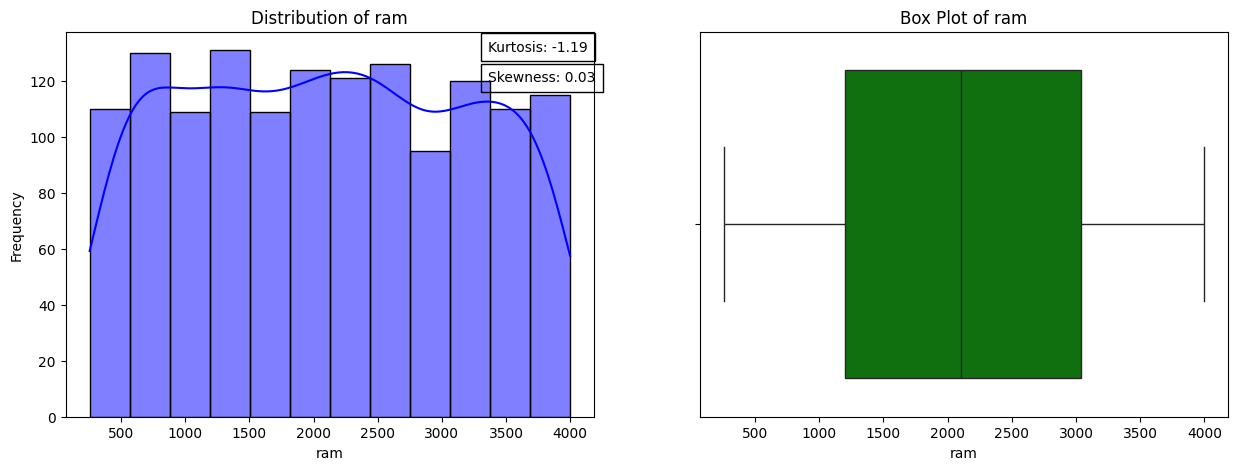

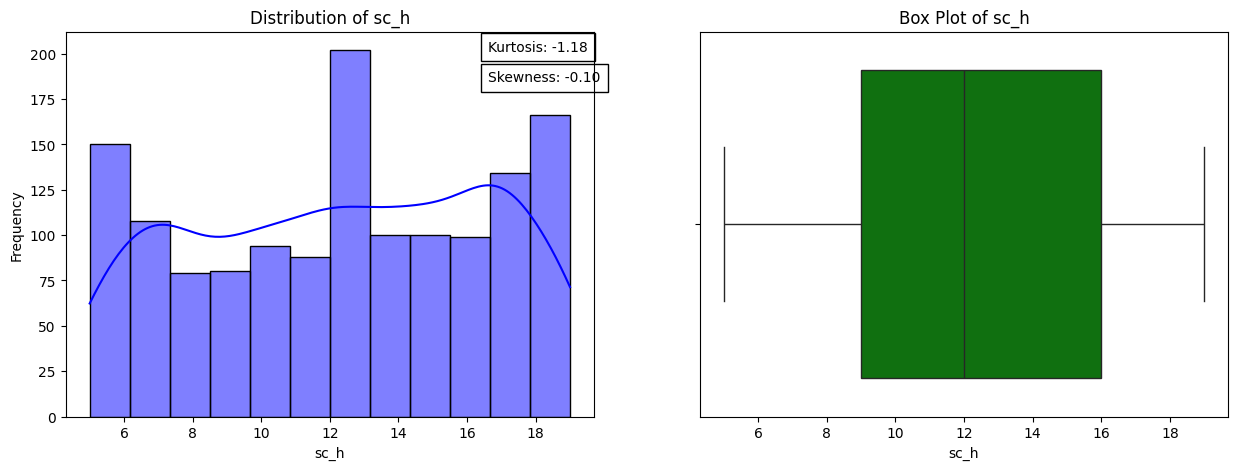

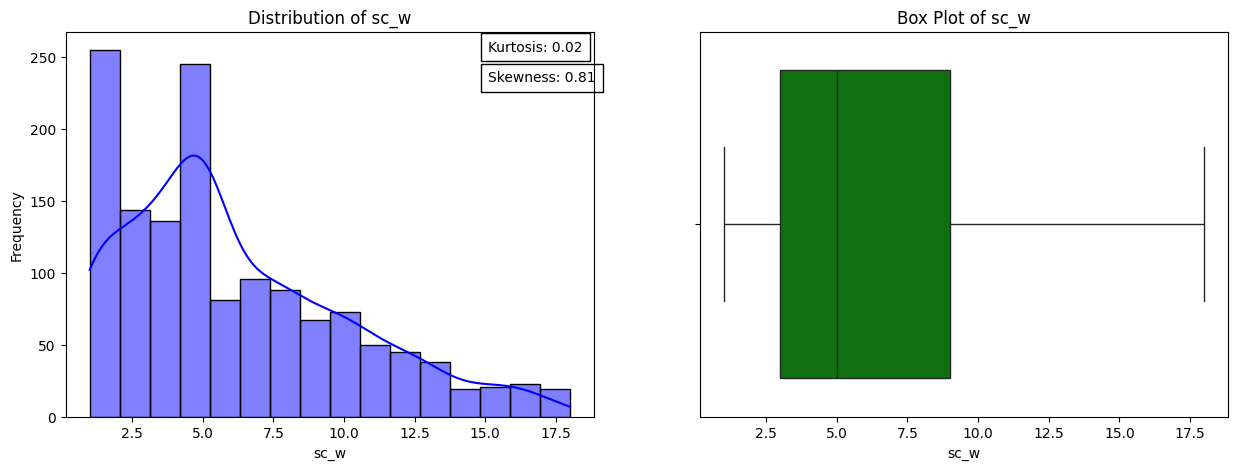

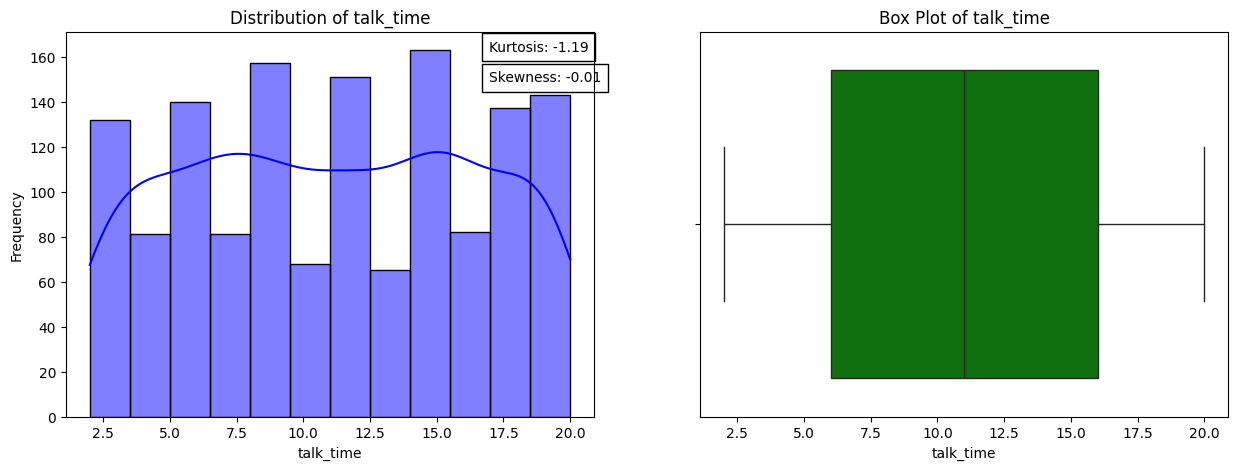

Distributions of non-numerical columns of train data


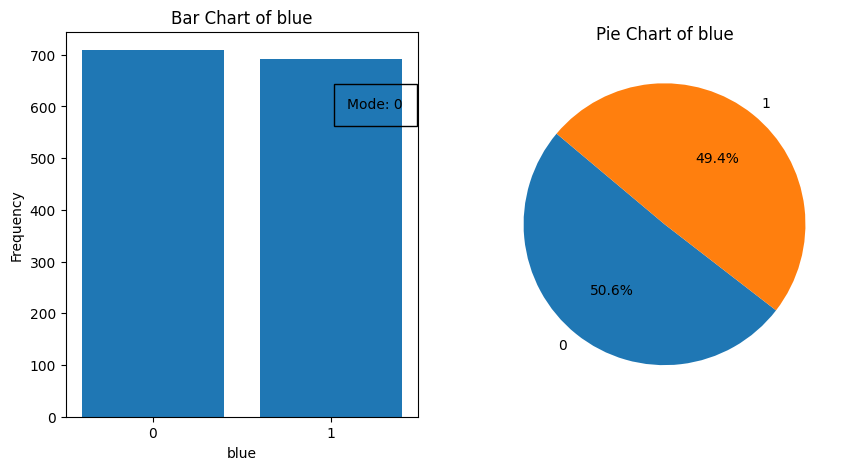

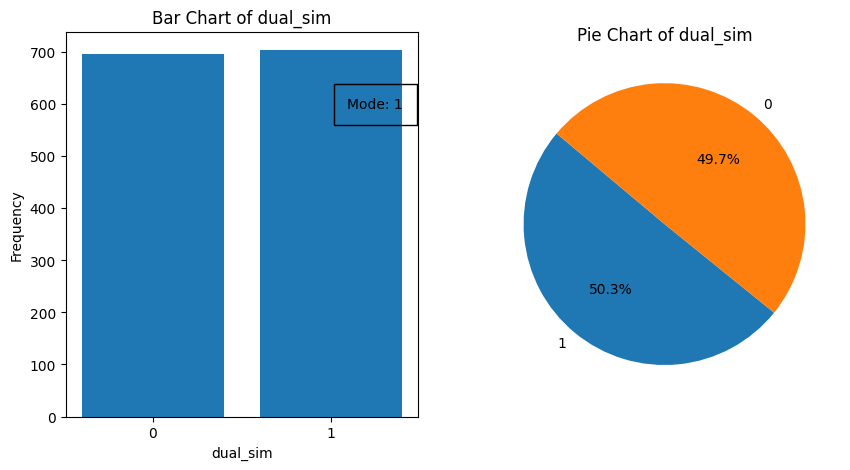

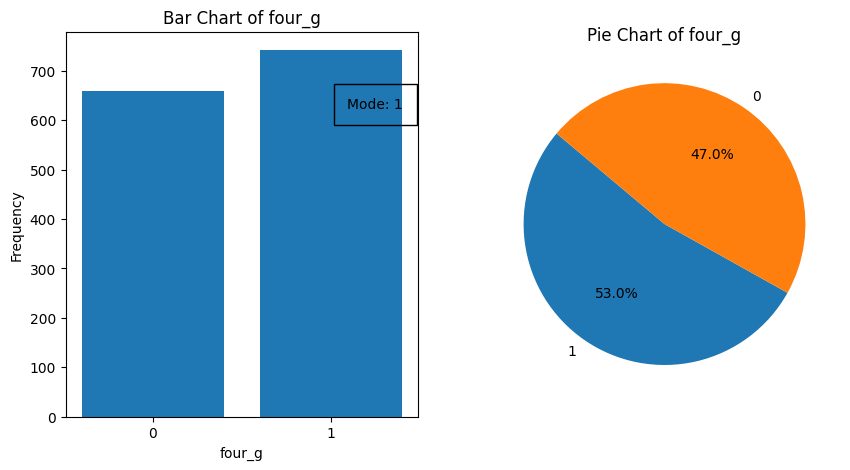

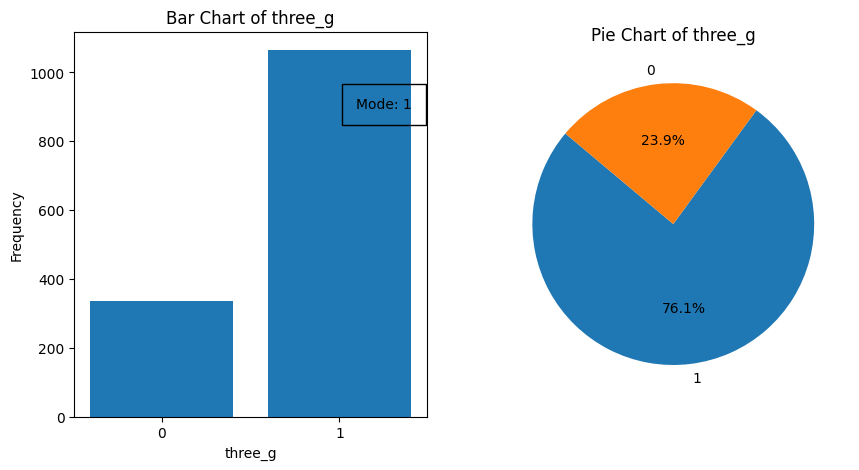

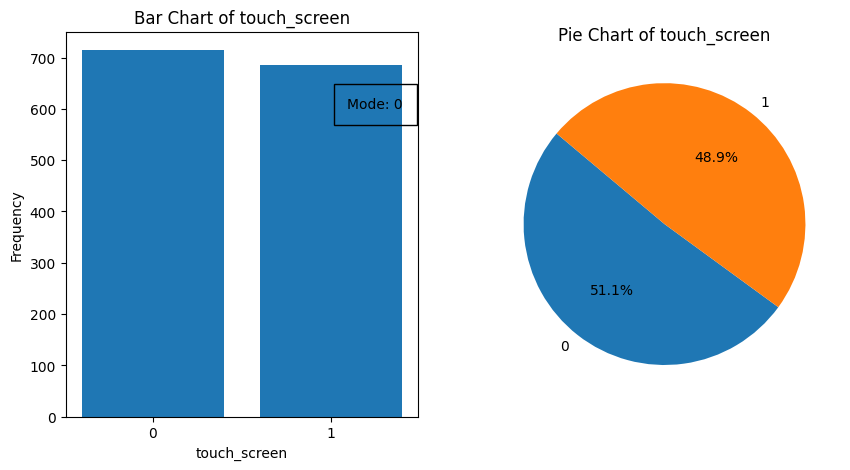

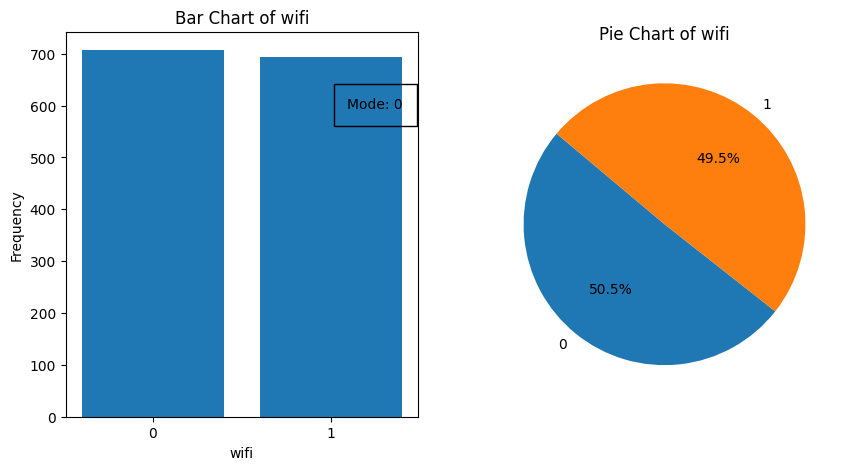

Distribution of target column (price range)


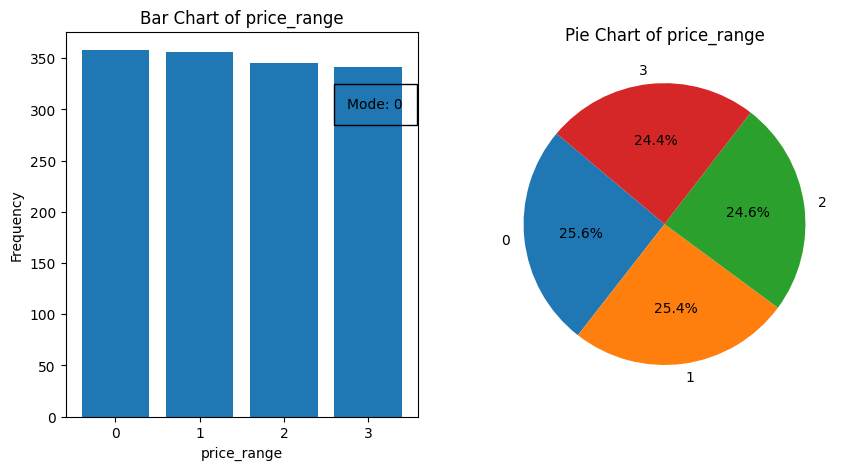

In [38]:
# visualize numerical columns
def plot_distribution_box(col, data):
    plt.figure(figsize=(15, 5))

    # distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], color='blue', kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # kurtosis
    kurtosis = data[col].kurtosis()
    plt.annotate(f"Kurtosis: {kurtosis:.2f}", xy=(0.8, 0.95), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='none', edgecolor='black', pad=5))

    # skewness
    plt.annotate(f"Skewness: {data[col].skew():.2f}", xy=(0.8, 0.87), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='none', edgecolor='black', pad=5))

    # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='green')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

    plt.show()

# visualize non-numerical columns
def plot_histogram_pie(col, data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # bar chart
    value_counts = data[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    ax1.bar(labels, sizes)
    if len(labels) == 2:
        ax1.set_xticks([0, 1])
    ax1.set_title(f"Bar Chart of {col}")
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    # mode
    mode = data[col].mode().iloc[0]
    ax1.annotate(f"Mode: {mode}", xy=(0.8, 0.8), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='none', edgecolor='black', pad=10))

    # pie chart
    value_counts = data[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax2.set_title(f"Pie Chart of {col}")

    plt.show()

# visualize numerical columns of train data
print("Distributions of numerical columns of train data")
for col in df_test_numerical:
    plot_distribution_box(col, df_train)

# visualize non-numerical columns of train data
print("Distributions of non-numerical columns of train data")
for col in df_train_non_numerical:
    plot_histogram_pie(col, df_train)

# visualize target column (price range)
print("Distribution of target column (price range)")
plot_histogram_pie('price_range', df_train)

#### Correlations with Price Range

In [39]:
# correlation numerical features and price_range (Matrix)
corr_numerical = df_train_numerical
corr_numerical['price_range'] = df_train['price_range']
corr_matrix_numerical = corr_numerical.corr(method='kendall').transpose()
corr_matrix_numerical

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.007205,-0.000248,0.010520,0.010032,0.008154,-0.012865,0.000151,-0.003910,-0.013323,-0.008527,-0.014844,-0.023790,0.026572,0.137501
clock_speed,0.007205,1.000000,0.001721,0.005278,-0.017207,0.005795,-0.008700,-0.003340,-0.011195,0.010247,0.015741,0.001434,0.006315,-0.000732,0.009864
fc,-0.000248,0.001721,1.000000,-0.033494,0.003191,0.022837,-0.001584,0.522382,-0.019277,-0.036656,0.000421,-0.005056,0.008030,0.004163,-0.004214
int_memory,0.010520,0.005278,-0.033494,1.000000,0.028645,-0.027028,-0.029775,-0.022017,0.005869,-0.003082,0.003970,0.019785,-0.001852,-0.020247,0.018828
m_dep,0.010032,-0.017207,0.003191,0.028645,1.000000,0.037862,-0.016904,0.015540,0.009840,-0.016849,-0.004484,-0.014348,-0.018769,0.011132,0.000722
mobile_wt,0.008154,0.005795,0.022837,-0.027028,0.037862,1.000000,-0.005265,0.003642,0.002358,-0.016552,-0.030935,-0.051250,-0.014409,-0.009392,-0.055800
n_cores,-0.012865,-0.008700,-0.001584,-0.029775,-0.016904,-0.005265,1.000000,0.002291,0.004403,0.017860,0.005625,-0.003078,0.005118,0.036397,-0.000319
pc,0.000151,-0.003340,0.522382,-0.022017,0.015540,0.003642,0.002291,1.000000,-0.006076,-0.029485,0.000486,0.002130,-0.029465,0.001859,-0.004563
px_height,-0.003910,-0.011195,-0.019277,0.005869,0.009840,0.002358,0.004403,-0.006076,1.000000,0.331315,-0.012537,0.032232,0.000832,0.004019,0.105583
px_width,-0.013323,0.010247,-0.036656,-0.003082,-0.016849,-0.016552,0.017860,-0.029485,0.331315,1.000000,0.014630,0.020202,0.021165,0.005627,0.133281


In [40]:
# correlation non_numerical features and price_range (Matrix)
corr_list = []

for feature in df_train_non_numerical:
    rank_biserial_corr = binary_continuous((df_train[feature]), df_train['price_range'], 'rank_biserial')
    corr_list.append({'Feature': feature, 'Rank-Biserial Correlation': rank_biserial_corr})

corr_matrix_non_numerical = pd.DataFrame(corr_list)

corr_matrix_non_numerical

,Feature,Rank-Biserial Correlation
0,blue,0.000134
1,dual_sim,-0.000034
2,four_g,0.000002
3,three_g,0.000101
4,touch_screen,-0.000095
5,wifi,0.000110


(15.5, -0.5)

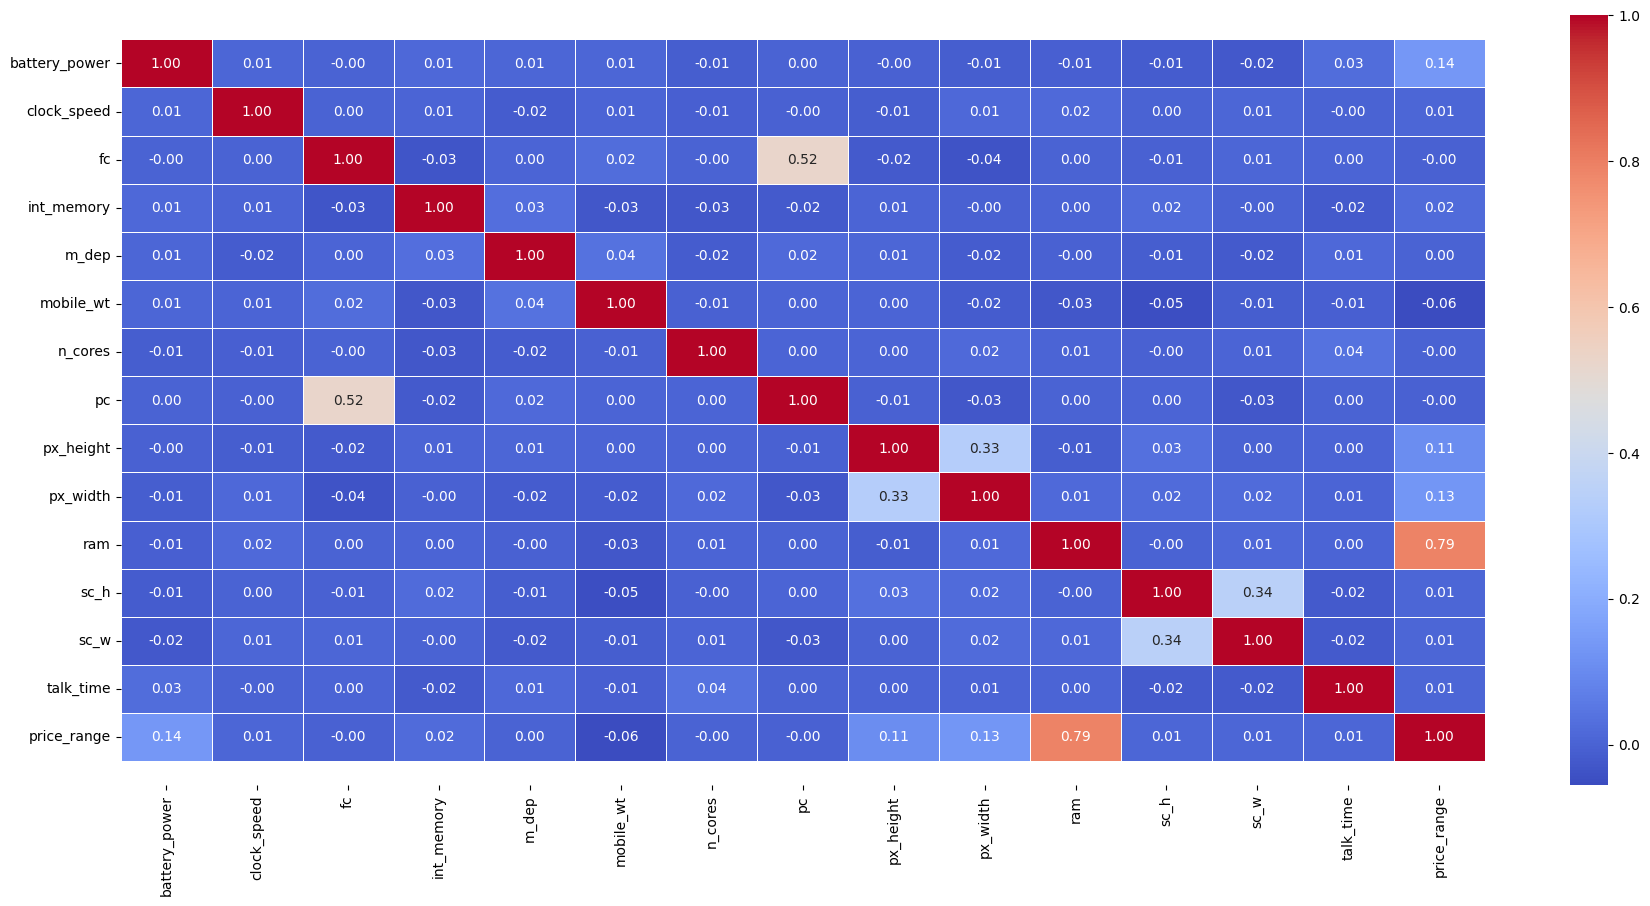

In [41]:
# Correlation of features in heatmap plot
fig, ax = plt.subplots(figsize=(22,10))
ax = sns.heatmap(corr_matrix_numerical, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top -0.5)

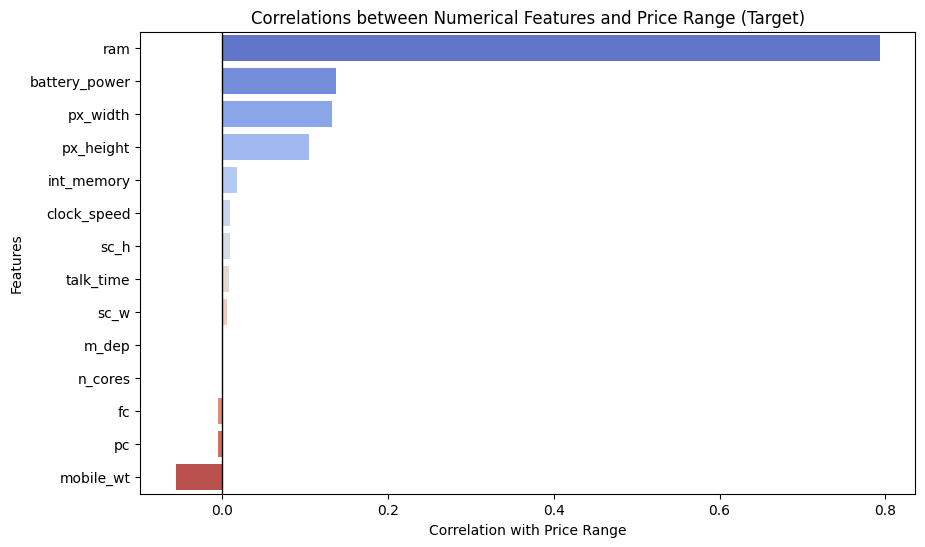

In [42]:
# correlation between numerical features and price range in bar plot
correlations = corr_matrix_numerical['price_range'].drop('price_range').sort_values(ascending=False).astype('float64')

plt.figure(figsize=(10,6))
ax = sns.barplot(x=correlations.values, y=correlations.index
                 , palette='coolwarm')
ax.axvline(x=0, color='black', lw=1)
ax.set_xlabel('Correlation with Price Range')
ax.set_ylabel('Features')
ax.set_title('Correlations between Numerical Features and Price Range (Target)')
plt.show()

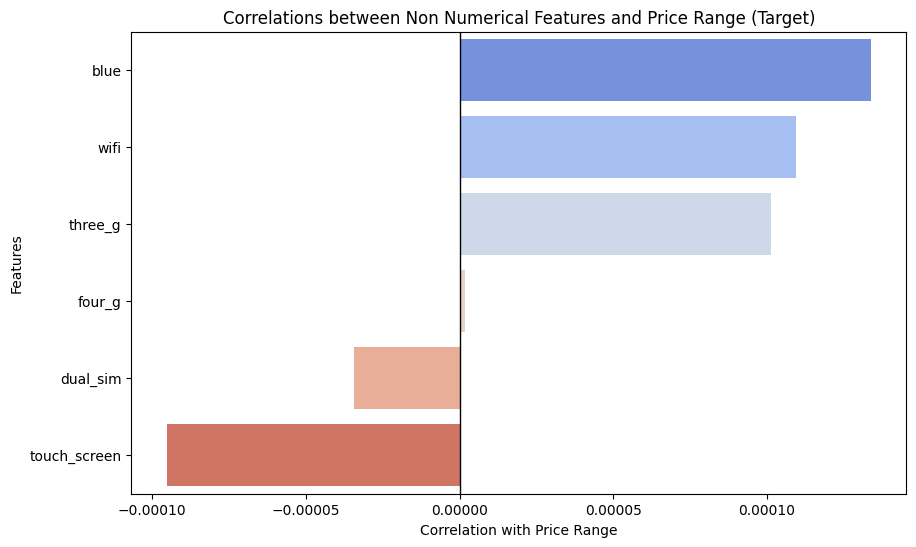

In [43]:
# correlation between non numerical features and price range in bar plot using Rank-Biserial Correlation
correlations = corr_matrix_non_numerical.sort_values(by='Rank-Biserial Correlation', ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Rank-Biserial Correlation', y='Feature', data=correlations, palette='coolwarm')
ax.axvline(x=0, color='black', lw=1)
ax.set_xlabel('Correlation with Price Range')
ax.set_ylabel('Features')
ax.set_title('Correlations between Non Numerical Features and Price Range (Target)')
plt.show()

## 5. Modeling

#### Split Training and Test Set

In [44]:
# feature selection

# drop columns with bad correlation value
df_train = df_train.drop(columns=['blue', 'wifi', 'three_g', 'four_g', 'dual_sim', 'touch_screen', 'n_cores', 'pc', 'fc', 'talk_time', 'sc_w', 'm_dep'])
df_validation = df_validation.drop(columns=['blue', 'wifi', 'three_g', 'four_g', 'dual_sim', 'touch_screen', 'n_cores', 'pc', 'fc', 'talk_time', 'sc_w', 'm_dep'])
df_test = df_test.drop(columns=['blue', 'wifi', 'three_g', 'four_g', 'dual_sim', 'touch_screen', 'n_cores', 'pc', 'fc', 'talk_time', 'sc_w', 'm_dep'])

In [45]:
# divide data into X and y

from sklearn.model_selection import train_test_split

# one-hot encoding (convert categorical variable into binary)
df_train = pd.get_dummies(df_train)
df_validation = pd.get_dummies(df_validation)
df_all = pd.concat([df_train, df_validation], axis=0, ignore_index=True)
df_test = pd.get_dummies(df_test)

X_train = df_train.drop(['price_range'], axis=1)
y_train = df_train['price_range']

X_test = df_validation.drop(['price_range'], axis=1)
y_test = df_validation['price_range']

X_all = df_all.drop(['price_range'], axis=1)
y_all = df_all['price_range']

#### K-Nearest Neighbor

In [46]:
# KNN Class
class KNN:
    
    # constructor
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    # calculate euclidean distance between two data points 
    def euclidean_distance(self, row1, row2):
        return np.sqrt(np.sum((row1 - row2) ** 2))

    # get nearest data point
    def get_neighbors(self, X_test):
        distances = []

        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(X_test, self.X_train[i])
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda tup: tup[0])
        neighbors = distances[:self.k]

        return neighbors

    # assign local data point from data 
    def fit(self, X_train, y_train):
        self.X_train = X_train.values
        self.y_train = y_train.values

    # calculate single point prediction value
    def _predict_single(self, x):
        neighbors = self.get_neighbors(x)
        output_values = [neighbor[1] for neighbor in neighbors]
        prediction = max(set(output_values), key=output_values.count)
        return prediction

    # calculate predictions value
    def predict(self, X_test):
        X_test = X_test.values

        # most likely not reachable
        # if X_test.ndim == 1:
        #     X_test = X_test.reshape(1, -1)

        predictions = [self._predict_single(x) for x in X_test]
        return predictions

In [47]:
# fit KNN with training data

knn_model = KNN(1) # result: (kaggle data: 99.8%) (validation data: +-92%) 
# knn_model = KNN(19) # result: (kaggle data: +-95%) (validation data: +-94%) 
# knn_model = KNN(7) # result: (kaggle data: +-95%) (validation data: +-93%) 

knn_model.fit(X_train, y_train)

#### Naive-Bayes

In [48]:
# Naive Bayes Class
class NaiveBayes:

    # constructor
    def __init__(self):
        self.class_probs = None
        self.feature_stats = None

    # calculate each class probability
    def calculate_class_probs(self, y_train):
        unique_classes, class_counts = np.unique(y_train, return_counts=True)
        total_samples = len(y_train)
        class_probs = dict(zip(unique_classes, class_counts / total_samples))
        return class_probs

    # calculate statistics of each features 
    def calculate_feature_stats(self, X_train, y_train):
        unique_classes = np.unique(y_train)
        feature_stats = {}

        for class_label in unique_classes:
            class_mask = (y_train == class_label)
            class_samples = X_train[class_mask]
            feature_means = np.mean(class_samples, axis=0)
            feature_stds = np.std(class_samples, axis=0)
            feature_stats[class_label] = {'mean': feature_means, 'std': feature_stds}

        return feature_stats

    # assign local data point from data
    def fit(self, X_train, y_train):
        self.class_probs = self.calculate_class_probs(y_train)
        self.feature_stats = self.calculate_feature_stats(X_train, y_train)
    
    # calculate likelihood of single feature
    def calculate_likelihood_gaussian(self, feat_val, mean, std):
        p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val - mean)**2 / (2 * std**2)))
        return p_x_given_y

    # calculate single class prediction value
    def _predict_single(self, x):
        class_probs = {}

        for class_label, class_prob in self.class_probs.items():
            feature_stats = self.feature_stats[class_label]['mean'], self.feature_stats[class_label]['std']

            # Assuming features are continuous
            likelihood = np.prod(
                [self.calculate_likelihood_gaussian(x[i], feature_stats[0][i], feature_stats[1][i]) for i in range(len(x))]
            )

            class_probs[class_label] = likelihood * class_prob

        prediction = max(class_probs, key=class_probs.get)
        return prediction

    # calculate prediction value
    def predict(self, X_test):
        # if X_test.ndim == 1:
        #     X_test = X_test.reshape(1, -1)

        predictions = [self._predict_single(x) for x in X_test]
        return predictions


In [49]:
# fit Naive-Bayes with training data

nb_model = NaiveBayes()

nb_model.fit(X_train, y_train)

#### KNN from Scikit Learn

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# fit KNN Scikit Learn with training data

knn_model_sklearn = KNeighborsClassifier(n_neighbors=1)

knn_model_sklearn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Naive-Bayes from Scikit Learn

In [51]:
from sklearn.naive_bayes import GaussianNB

# fit NB Scikit Learn with training data

nb_model_sklearn = GaussianNB()

nb_model_sklearn.fit(X_train, y_train)

GaussianNB()

### Training Score 

#### KNN

In [52]:
# predicting with KNN for train data

y_pred_train_KNN = knn_model.predict(X_train)

In [53]:
# evaluation for KNN training (1/2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_pred_train_KNN)
precision = precision_score(y_train, y_pred_train_KNN, average='weighted')
recall = recall_score(y_train, y_pred_train_KNN, average='weighted')
f1 = f1_score(y_train, y_pred_train_KNN, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


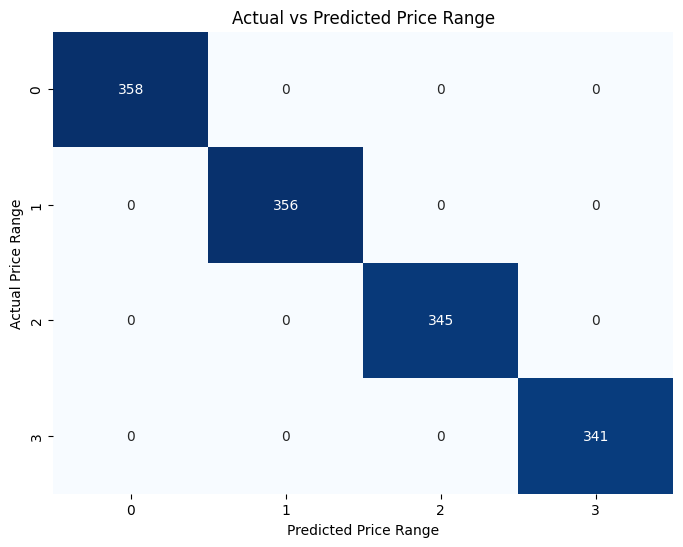

In [54]:
# evaluation for KNN training (2/2)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_pred_train_KNN)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


In [55]:
# predicting with KNN for validation data

y_pred_test_KNN = knn_model.predict(X_test)

In [56]:
# evaluation for KNN validation (1/2)

accuracy = accuracy_score(y_test, y_pred_test_KNN)
precision = precision_score(y_test, y_pred_test_KNN, average='weighted')
recall = recall_score(y_test, y_pred_test_KNN, average='weighted')
f1 = f1_score(y_test, y_pred_test_KNN, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9183333333333333
Precision: 0.9179218265792964
Recall: 0.9183333333333333
F1 Score: 0.9179903781969241


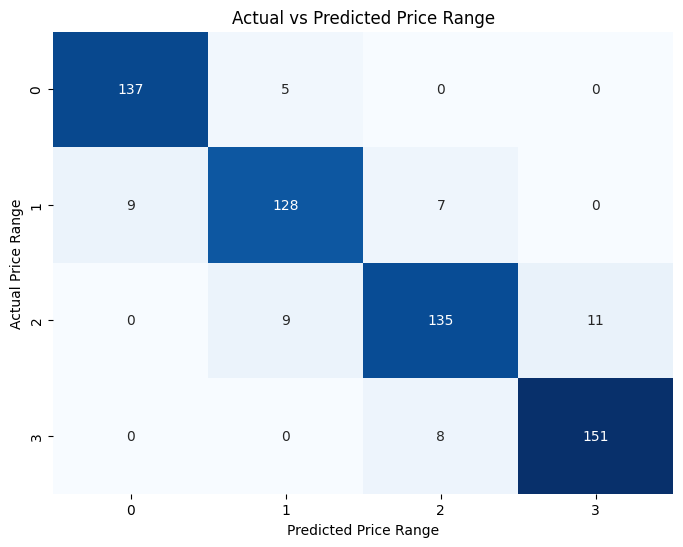

In [57]:
# evaluation for KNN validation (2/2)

conf_matrix = confusion_matrix(y_test, y_pred_test_KNN)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


#### Naive-Bayes

In [58]:
# predicting with NB for train data

# get encoded x_train as binary
y_train_encoded = pd.get_dummies(X_train)

# ensure all values are numeric
y_train_numeric = y_train_encoded.astype(float)

# use y_train_numeric for NB prediction
y_pred_train_NB = nb_model.predict(y_train_numeric.values)

In [59]:
# evaluation for NB training (1/2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_train, y_pred_train_NB)
precision = precision_score(y_train, y_pred_train_NB, average='weighted')
recall = recall_score(y_train, y_pred_train_NB, average='weighted')
f1 = f1_score(y_train, y_pred_train_NB, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8114285714285714
Precision: 0.8121726598128494
Recall: 0.8114285714285714
F1 Score: 0.8117668200500303


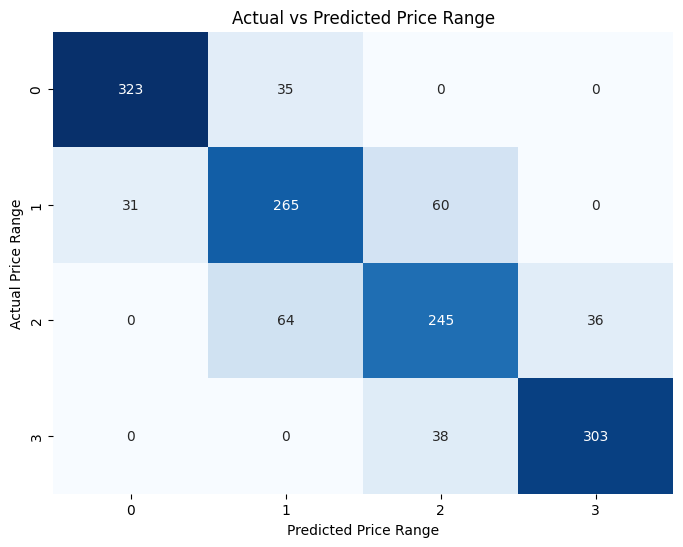

In [60]:
# evaluation for NB training (2/2)

conf_matrix = confusion_matrix(y_train, y_pred_train_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()

In [61]:
# predicting with KNN for validation data

# get encoded x_test as binary
y_test_encoded = pd.get_dummies(X_test)

# ensure all values are numeric
y_test_numeric = y_test_encoded.astype(float)

# use y_test_numeric for prediction
y_pred_test_NB = nb_model.predict(y_test_numeric.values)

In [62]:
# evaluation for NB validation (1/2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_test_NB)
precision = precision_score(y_test, y_pred_test_NB, average='weighted')
recall = recall_score(y_test, y_pred_test_NB, average='weighted')
f1 = f1_score(y_test, y_pred_test_NB, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.79
Precision: 0.7914451365746124
Recall: 0.79
F1 Score: 0.7903706433194465


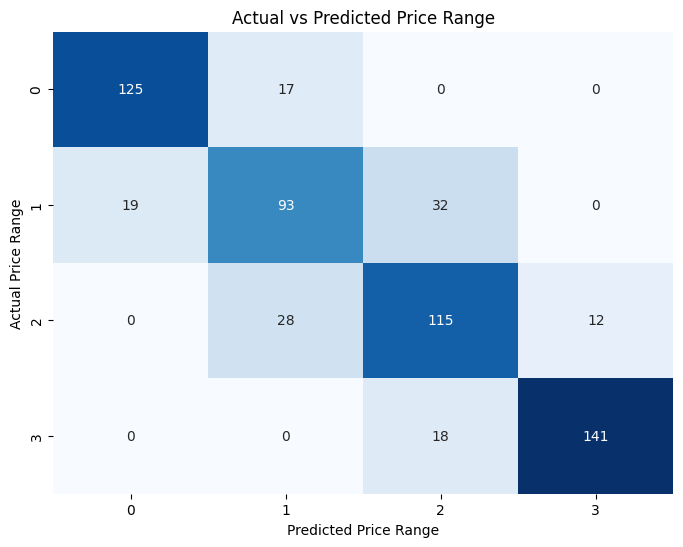

In [63]:
# evaluation for NB validation (2/2)

conf_matrix = confusion_matrix(y_test, y_pred_test_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


### KNN from Scikit Learn

In [64]:
# predicting with KNN scikit for training data

y_pred_train_KNN_sklearn = knn_model_sklearn.predict(X_train)

In [65]:
# evaluation for KNN scikit training (1/2)

accuracy = accuracy_score(y_train, y_pred_train_KNN_sklearn)
precision = precision_score(y_train, y_pred_train_KNN_sklearn, average='weighted')
recall = recall_score(y_train, y_pred_train_KNN_sklearn, average='weighted')
f1 = f1_score(y_train, y_pred_train_KNN_sklearn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


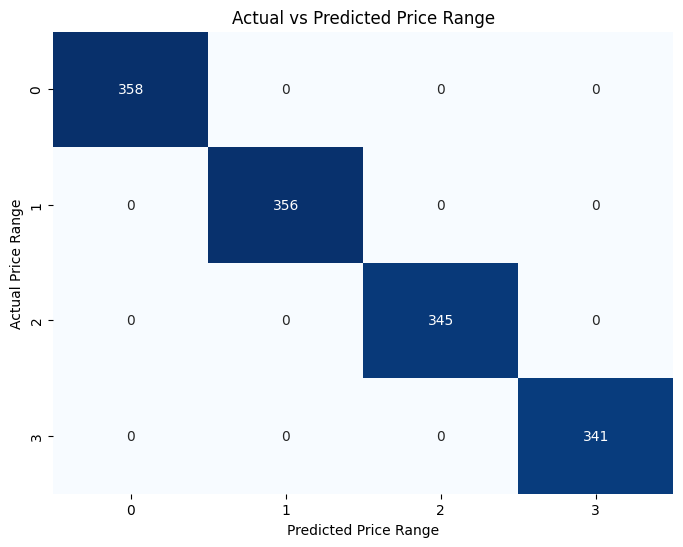

In [66]:
# evaluation for KNN scikit training (2/2)

conf_matrix = confusion_matrix(y_train, y_pred_train_KNN_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()

In [67]:
# predicting with KNN scikit for validation data

y_pred_test_KNN_sklearn = knn_model_sklearn.predict(X_test)

In [68]:
# evaluation for KNN scikit validation (1/2)

accuracy = accuracy_score(y_test, y_pred_test_KNN_sklearn)
precision = precision_score(y_test, y_pred_test_KNN_sklearn, average='weighted')
recall = recall_score(y_test, y_pred_test_KNN_sklearn, average='weighted')
f1 = f1_score(y_test, y_pred_test_KNN_sklearn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9183333333333333
Precision: 0.9179218265792964
Recall: 0.9183333333333333
F1 Score: 0.9179903781969241


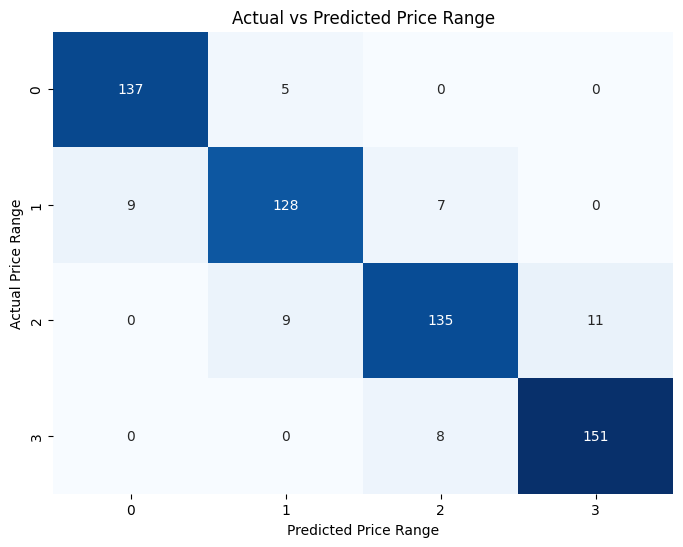

In [69]:
# evaluation for KNN scikit validation (2/2)

conf_matrix = confusion_matrix(y_test, y_pred_test_KNN_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


### Naive Bayes from Scikit Learn

In [70]:
# predicting with NB scikit for training data

y_pred_train_NB_sklearn = nb_model_sklearn.predict(X_train)

In [71]:
# evaluation for NB scikit training (1/2)

accuracy = accuracy_score(y_train, y_pred_train_NB_sklearn)
precision = precision_score(y_train, y_pred_train_NB_sklearn, average='weighted')
recall = recall_score(y_train, y_pred_train_NB_sklearn, average='weighted')
f1 = f1_score(y_train, y_pred_train_NB_sklearn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8114285714285714
Precision: 0.8121726598128494
Recall: 0.8114285714285714
F1 Score: 0.8117668200500303


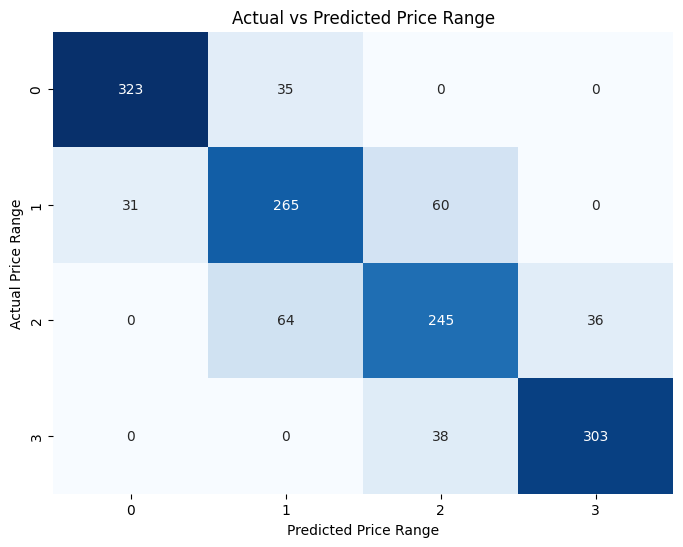

In [72]:
# evaluation for NB scikit training (2/2)

conf_matrix = confusion_matrix(y_train, y_pred_train_NB_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


In [73]:
# predicting with NB scikit for validation data

y_pred_test_NB_sklearn = nb_model_sklearn.predict(X_test)

In [74]:
# evaluation for NB scikit validation (1/2)

accuracy = accuracy_score(y_test, y_pred_test_NB_sklearn)
precision = precision_score(y_test, y_pred_test_NB_sklearn, average='weighted')
recall = recall_score(y_test, y_pred_test_NB_sklearn, average='weighted')
f1 = f1_score(y_test, y_pred_test_NB_sklearn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.79
Precision: 0.7914451365746124
Recall: 0.79
F1 Score: 0.7903706433194465


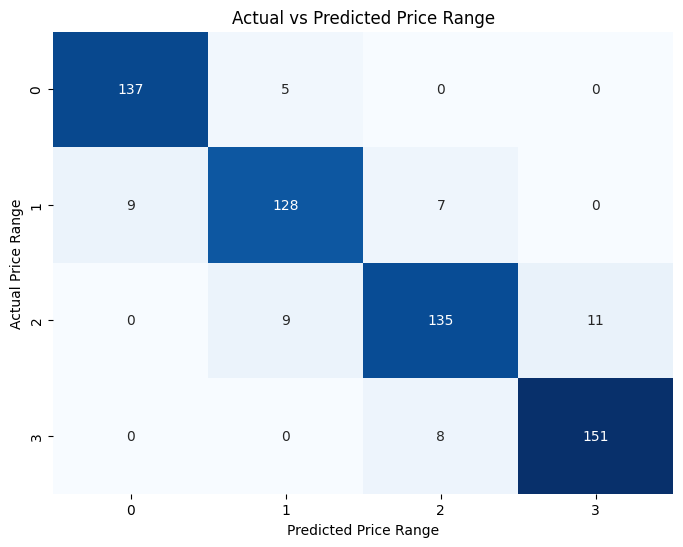

In [75]:
# evaluation for NB scikit validation (2/2)

conf_matrix = confusion_matrix(y_test, y_pred_test_KNN_sklearn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


# Submission

In [76]:
# fit KNN with all (train + validation) data

knn_model = KNN(1) # use k = 1
# knn_model = KNN(19) # use k = 19

knn_model.fit(X_all, y_all)

In [77]:
# save KNN model
pickle.dump(knn_model, open(f'{model_path}KNN.pkl','wb'))

In [78]:
# fit Naive-Bayes with all (train + validation) data

nb_model = NaiveBayes()

nb_model.fit(X_all, y_all)

In [79]:
# save NB model
pickle.dump(nb_model, open(f'{model_path}NB.pkl','wb'))

#### Predict Using Existing Model

In [80]:
# predict test data with KNN model
with open(f'{model_path}KNN.pkl', 'rb') as file:
    knn_loaded_model = pickle.load(file)

y_pred_submit_KNN = knn_loaded_model.predict(df_test)

In [81]:
# predict test data with NB model

y_submit_encoded = pd.get_dummies(df_test)

# ensure all values are numeric
y_submit_numeric = y_submit_encoded.astype(float)

# use y_test_numeric for prediction
y_pred_submit_NB = nb_model.predict(y_submit_numeric.values)

In [82]:
# predict test data with NB model

results_df = pd.DataFrame({'price_range': y_pred_submit_NB})

results_df['id'] = range(len(results_df))

results_df = results_df[['id', 'price_range']]

results_df.to_csv(f'{output_path}prediction1_bayes.csv', index=False)

In [83]:
# predict test data with KNN model

results_df = pd.DataFrame({'price_range': y_pred_submit_KNN})

results_df['id'] = range(len(results_df))

results_df = results_df[['id', 'price_range']]

# counting occurrences of each price range
price_range_counts = results_df['price_range'].value_counts()

# printing the counts for each price range
for price_range, count in price_range_counts.items():
    print(f'Price Range {price_range}: {count} occurrences')


results_df.to_csv(f'{output_path}prediction14.csv', index=False)

Price Range 2: 501 occurrences
Price Range 0: 500 occurrences
Price Range 3: 500 occurrences
Price Range 1: 499 occurrences


In [84]:
# for testing

df_submit = pd.read_csv(f"{output_path}./prediction14.csv")

y_submit = df_submit['price_range']

y_pred_submit_KNN = results_df['price_range']

accuracy = accuracy_score(y_submit, y_pred_submit_KNN)
precision = precision_score(y_submit, y_pred_submit_KNN, average='weighted')
recall = recall_score(y_submit, y_pred_submit_KNN, average='weighted')
f1 = f1_score(y_submit, y_pred_submit_KNN, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

differing_rows = np.where(y_submit != y_pred_submit_KNN)[0]

# Print differing rows of df_test, y_submit, and y_pred_submit_KNN
# for row_index in differing_rows:
#     print("Row Index:", row_index)
#     print("df_test Row:")
#     print(df_test.iloc[row_index])
#     print("Actual Value (y_submit):", y_submit.iloc[row_index])
#     print("Predicted Value (y_pred_submit_KNN):", y_pred_submit_KNN.iloc[row_index])
#     print("\n" + "="*50 + "\n")  # Just for better separation in the output


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


2000
2000


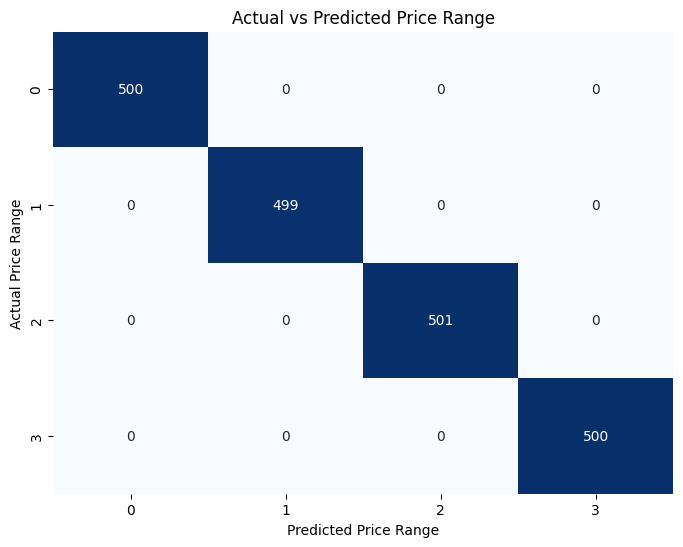

In [85]:
# for testing

conf_matrix = confusion_matrix(y_submit, y_pred_submit_KNN)

print(len(y_submit))
print(len(y_pred_submit_KNN))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Price Range')
plt.ylabel('Actual Price Range')
plt.title('Actual vs Predicted Price Range')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=257aad47-379f-4701-a491-e74e88c85dab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>